In [420]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
from scipy import interpolate

In [421]:
trainFeatures = pd.read_csv('data/train_features.csv')
testFeatures = pd.read_csv('data/test_features.csv')
trainLabels = pd.read_csv('data/train_labels.csv')
example = pd.read_csv('data/submission_format.csv')

In [422]:
trainFeatures.head()

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
0,1979,Sarjana,Rencana Menikah,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2014-05-05
1,1950,Sarjana,Rencana Menikah,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17
2,1966,Sarjana,Menikah,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,NaN
3,1961,Magister,Rencana Menikah,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,NaN
4,1970,Sarjana,Rencana Menikah,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,NaN


In [423]:
trainFeatures.shape

(3817, 16)

In [424]:
testFeatures.head()

,ID,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
0,2241,1957,Sarjana,NaN,120660151.0,0.0,1.0,63.0,122277.0,541399.0,214192.0,84305.0,4.0,6.0,10.0,0.0,NaN
1,2274,1968,Doktor,Menikah,163551821.0,0.0,1.0,58.0,35761.0,353335.0,63365.0,41112.0,2.0,5.0,10.0,0.0,NaN
2,1107,1968,SMA,Menikah,29857000.0,0.0,0.0,34.0,8092.0,22253.0,30345.0,26299.0,2.0,0.0,5.0,0.0,2013-08-06
3,4478,1971,Doktor,Menikah,117949098.0,0.0,1.0,82.0,4872.0,126061.0,0.0,9745.0,3.0,5.0,7.0,0.0,NaN
4,5080,1974,Sarjana,Rencana Menikah,164761134.0,0.0,0.0,28.0,343208.0,1416462.0,236196.0,107776.0,0.0,1.0,8.0,0.0,NaN


In [425]:
example.head()

,ID,jumlah_promosi
0,2241,6
1,2274,6
2,1107,6
3,4478,6
4,5080,6


# Data Assessing

## Informasi Umum Dataset Train Features

In [426]:
trainFeatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tahun_kelahiran          3817 non-null   int64  
 1   pendidikan               3628 non-null   object 
 2   status_pernikahan        3605 non-null   object 
 3   pendapatan               3627 non-null   float64
 4   jumlah_anak_balita       3627 non-null   float64
 5   jumlah_anak_remaja       3613 non-null   float64
 6   terakhir_belanja         3645 non-null   float64
 7   belanja_buah             3636 non-null   float64
 8   belanja_daging           3639 non-null   float64
 9   belanja_ikan             3624 non-null   float64
 10  belanja_kue              3603 non-null   float64
 11  pembelian_diskon         3639 non-null   float64
 12  pembelian_web            3652 non-null   float64
 13  pembelian_toko           3648 non-null   float64
 14  keluhan                 

In [427]:
trainFeatures.describe()

,tahun_kelahiran,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan
count,3817.000000,3.627000e+03,3627.000000,3613.000000,3645.000000,3636.000000,3.639000e+03,3624.000000,3603.000000,3639.000000,3652.000000,3648.000000,3621.000000
mean,1967.823946,1.144832e+08,0.293080,0.353723,47.231550,59804.239824,4.385748e+05,81428.997792,63377.970580,2.125584,4.436473,5.767818,0.004971
std,11.768131,4.346042e+07,0.473063,0.493014,27.068512,74024.976109,5.120427e+05,99976.226855,79435.457282,2.100133,3.002522,3.210738,0.070340
min,1899.000000,5.073000e+06,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,8.112512e+07,0.000000,0.000000,25.000000,7907.000000,4.947950e+04,10115.000000,7947.000000,0.000000,2.000000,3.000000,0.000000
50%,1968.000000,1.156214e+08,0.000000,0.000000,47.000000,26456.000000,2.219930e+05,36054.500000,27795.000000,2.000000,4.000000,5.000000,0.000000
75%,1976.000000,1.504960e+08,1.000000,1.000000,69.000000,86162.000000,6.863555e+05,121380.000000,89502.500000,3.000000,7.000000,8.000000,0.000000
max,2000.000000,3.328840e+08,2.000000,2.000000,128.000000,396508.000000,3.489675e+06,621600.000000,542164.000000,20.000000,30.000000,17.000000,1.000000


## Cek Nilai Null Dataset Train Features

In [428]:
trainFeatures.isnull().sum()

tahun_kelahiran               0
pendidikan                  189
status_pernikahan           212
pendapatan                  190
jumlah_anak_balita          190
jumlah_anak_remaja          204
terakhir_belanja            172
belanja_buah                181
belanja_daging              178
belanja_ikan                193
belanja_kue                 214
pembelian_diskon            178
pembelian_web               165
pembelian_toko              169
keluhan                     196
tanggal_menjadi_anggota    2752
dtype: int64

## Cek Nilai Duplikat Dataset Train Features

In [429]:
trainFeatures.duplicated().sum()

0

# Data Cleaning

## Kolom Pendidikan

In [430]:
# Cek Nilai Unique
trainFeatures['pendidikan'].unique()

array(['Sarjana', 'Magister', 'SMA', 'SMP', 'Doktor', nan, '5'],
      dtype=object)

Terdapat dua nilai salah yaitu nan dan '5'. Maka perlu dibersihkan pada dua nilai tersebut.

### Olah Data dengan Nilai Unique '5'

In [431]:
# Ambil contoh nilai pada kolom pendidikan dengan nilai '5'
trainFeatures[trainFeatures['pendidikan'] == '5'].head()

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
309,1958,5,Sendiri,64570844.0,1.0,1.0,7.0,4810.0,6113.0,4359.0,7597.0,3.0,1.0,4.0,0.0,NaN
1596,1977,5,Menikah,136702741.0,0.0,0.0,86.0,51072.0,1477175.0,211531.0,86926.0,3.0,3.0,13.0,0.0,NaN


In [432]:
# Mengambil indeks data dengan nilai unique '5'
dropPendidikan = trainFeatures[trainFeatures['pendidikan'] == '5'].index
# Menghapus nilai dengan indeks tersebut
trainFeatures.drop(dropPendidikan, inplace=True)

Saat ini nilai dengan inputan '5' sudah terhapus, karena hanya terdapat 2 data saja maka dapat dikatakan aman untuk dihapus.

Selanjutnya yaitu menangani data dengan inputan nan. Untuk langkah yang diambil yaitu mengecek seberapa banyak nilai nan yang ada. Jika jumlah terbilang sedikit, langkah yang diambil adalah menghapus nilai tersebut (seperti pada inputan '5' sebelumnya). Namun, jika jumlahnya terbilang cukup banyak, maka langkah yang diambil yaitu mengubah setiap nilai nan menjadi nilai modus pada kolom **pendidikan**.

### Olah Data dengan Nilai Unique NaN

In [433]:
# Mengambil sample data dengan inputan nan
dataNanPendidikan = trainFeatures[trainFeatures['pendidikan'].isnull()]

# Mengecek Banyak Baris Data
print('Banyak Data dengan inputan nan:', dataNanPendidikan.shape[0], '\n')
print('Dengan sample data sebagai berikut: ')
dataNanPendidikan.sample(10)

Banyak Data dengan inputan nan: 189 

Dengan sample data sebagai berikut: 


,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
1235,1962,NaN,Sendiri,166147421.0,0.0,0.0,88.0,155560.0,1812237.0,76382.0,154726.0,0.0,6.0,10.0,0.0,NaN
1194,1977,NaN,Menikah,78885377.0,1.0,0.0,5.0,9298.0,47382.0,12125.0,2437.0,3.0,0.0,4.0,0.0,NaN
2683,1976,NaN,Sendiri,100945727.0,0.0,NaN,98.0,11768.0,171276.0,738.0,19860.0,0.0,5.0,5.0,NaN,NaN
2211,1977,NaN,Rencana Menikah,45959126.0,1.0,0.0,18.0,13448.0,NaN,33505.0,3390.0,2.0,0.0,1.0,0.0,NaN
590,1973,NaN,Rencana Menikah,92281916.0,0.0,1.0,57.0,137375.0,287506.0,249047.0,198114.0,5.0,8.0,4.0,0.0,NaN
258,1963,NaN,Rencana Menikah,119591357.0,0.0,1.0,25.0,16646.0,296940.0,23610.0,39476.0,3.0,5.0,9.0,0.0,NaN
3451,1951,NaN,Menikah,131968770.0,0.0,1.0,25.0,80170.0,285983.0,77895.0,56687.0,2.0,8.0,9.0,0.0,NaN
1057,1959,NaN,Sendiri,180019000.0,0.0,0.0,15.0,60690.0,1755964.0,50575.0,32368.0,1.0,5.0,5.0,0.0,2013-11-18
1311,1974,NaN,Menikah,52694000.0,1.0,0.0,41.0,18207.0,28322.0,20230.0,10115.0,2.0,0.0,1.0,0.0,2014-03-13
210,1973,NaN,Menikah,80923000.0,1.0,1.0,96.0,6069.0,24276.0,0.0,NaN,2.0,4.0,5.0,0.0,2014-05-26


Dikarenakan jumlah dari data nan cukup banyak, maka akan dilakukan pengubahan isi dengan data modus pada kolom **pendidikan**.

In [434]:
# Mengambil jumlah isi terbanyak pada kolom pendidikan
modePendidikan = trainFeatures['pendidikan'].mode()[0]
print('Nilai dengan modus terbanyak adalah', modePendidikan)

Nilai dengan modus terbanyak adalah Sarjana


In [435]:
# Mengubah nilai nan menjadi nilai modus
trainFeatures['pendidikan'] = trainFeatures['pendidikan'].fillna(modePendidikan)

In [436]:
# Cek ulang nilai unique
trainFeatures['pendidikan'].unique()

array(['Sarjana', 'Magister', 'SMA', 'SMP', 'Doktor'], dtype=object)

Pada saat ini, kondisi kolom **pendidikan** sudah normal.

## Kolom Status Pernikahan

In [437]:
# Cek Nilai Unique
trainFeatures['status_pernikahan'].unique()

array(['Rencana Menikah', 'Menikah', 'Sendiri', 'Cerai', nan,
       'Cerai Mati', '5'], dtype=object)

Mirip dengan kolom Pendidikan, terdapat dua nilai tidak sesuai pada kolom **Status Pernikahan** yaitu '5' dan nan. Maka perlu dilakukan proses yang sama dengan kolom Pendidikan yaitu meninjau setiap invalid value yang ada untuk dilakukan langkah lebih lanjut.

### Olah Data dengan Nilai Unique '5'

In [438]:
# Mengambil sample data dengan nilai unique '5'
trainFeatures[trainFeatures['status_pernikahan'] == '5']

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
522,1944,Doktor,5,113851181.0,1.0,0.0,42.0,14161.0,27044.0,NaN,7791.0,1.0,0.0,0.0,0.0,NaN


Dikarenakan hanya terdapat satu nilai saja dengan value '5', maka dapat dihapus saja karena tidak terlalu berpengaruh terhadap keseluruhan data.

In [439]:
# Mengambil data dengan nilai unique '5'
dropStatusNikah = trainFeatures[trainFeatures['status_pernikahan'] == '5'].index
# Menghapus data
trainFeatures.drop(dropStatusNikah, inplace=True)

### Olah Data dengan Nilai Unique NaN

In [440]:
# Mengambil sample data dengan inputan nan
dataNanPernikahan = trainFeatures[trainFeatures['status_pernikahan'].isnull()]

# Mengecek Banyak Baris Data
print('Banyak Data dengan inputan nan:', dataNanPernikahan.shape[0], '\n')
print('Dengan sample data sebagai berikut: ')
dataNanPernikahan.sample(10)

Banyak Data dengan inputan nan: 212 

Dengan sample data sebagai berikut: 


,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
1677,1978,Magister,NaN,143442074.0,0.0,1.0,44.0,31218.0,336760.0,99933.0,74948.0,3.0,8.0,10.0,0.0,NaN
1055,1980,Magister,NaN,138329376.0,0.0,0.0,71.0,200187.0,586027.0,40872.0,267657.0,0.0,7.0,4.0,0.0,NaN
3808,1963,Magister,NaN,117190625.0,0.0,1.0,69.0,2545.0,106247.0,1044.0,11880.0,1.0,3.0,11.0,0.0,NaN
320,1973,Sarjana,NaN,46920000.0,1.0,0.0,11.0,12138.0,NaN,26299.0,4046.0,4.0,1.0,2.0,0.0,2013-06-07
2103,1965,Sarjana,NaN,85508180.0,1.0,1.0,11.0,4006.0,193358.0,48097.0,60176.0,8.0,7.0,5.0,0.0,NaN
812,1974,Sarjana,NaN,85866146.0,1.0,0.0,45.0,19627.0,219139.0,25179.0,40433.0,7.0,8.0,6.0,0.0,NaN
1600,1959,Sarjana,NaN,152498388.0,0.0,0.0,8.0,139439.0,339814.0,128188.0,58617.0,2.0,10.0,3.0,0.0,NaN
2650,1969,SMA,NaN,116905024.0,NaN,1.0,55.0,34445.0,116254.0,2028.0,150071.0,2.0,3.0,4.0,0.0,NaN
65,1981,SMA,NaN,49661713.0,1.0,0.0,78.0,43582.0,20123.0,7855.0,19520.0,1.0,1.0,1.0,0.0,NaN
3626,1958,Sarjana,NaN,NaN,0.0,0.0,28.0,194306.0,1549352.0,315625.0,202681.0,0.0,4.0,5.0,0.0,NaN


Dikarenakan jumlah dari data nan cukup banyak, maka akan dilakukan pengubahan isi data nan dengan analisis lebih lanjut pada kolom-kolom yang berpotensi memiliki korelasi dengan kolom **status pernikahan**. 

Yaitu dengan melihat kolom **jumlah anak balita** dan **jumlah anak remaja** dengan asumsi jika memiliki nilai lebih dari 0 dari kedua kolom tersebut, maka akan diubah menjadi "Menikah".

In [441]:
# Ubah NaN menjadi String Terlebih Dahulu
trainFeatures['status_pernikahan'].fillna('kosong', inplace=True)

# Buat Fungsi
def ubahPernikahan(row):
    if row['status_pernikahan'] == 'kosong':
        if row['jumlah_anak_balita'] > 0 or row['jumlah_anak_remaja'] > 0:
            return 'Menikah'
        else:
            return 'Sendiri'
    else:
        return row['status_pernikahan']

trainFeatures['status_pernikahan'] = trainFeatures.apply(ubahPernikahan, axis=1)

In [442]:
trainFeatures['status_pernikahan'].unique()

array(['Rencana Menikah', 'Menikah', 'Sendiri', 'Cerai', 'Cerai Mati'],
      dtype=object)

Saat ini nilai unique pada kolom **status pernikahan** sudah normal dan tidak ada nilai nan.

## Kolom Pendapatan

In [443]:
trainFeatures.pendapatan.sample(5)

2191     27233181.0
1893     80096000.0
3738     64076000.0
2547     97656000.0
3350    155901404.0
Name: pendapatan, dtype: float64

### Cek Nilai Statistik 

In [444]:
trainFeatures.describe()

,tahun_kelahiran,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan
count,3814.000000,3.624000e+03,3624.000000,3610.000000,3642.000000,3633.000000,3.636000e+03,3622.000000,3600.000000,3636.000000,3649.000000,3645.000000,3618.000000
mean,1967.830362,1.144910e+08,0.292770,0.353740,47.233388,59834.344344,4.385213e+05,81414.356157,63402.365000,2.125413,4.439024,5.767901,0.004975
std,11.764420,4.346894e+07,0.472942,0.493031,27.063687,74045.898408,5.118685e+05,99972.253724,79456.742289,2.100816,3.002223,3.208269,0.070369
min,1899.000000,5.073000e+06,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,8.112568e+07,0.000000,0.000000,25.000000,7908.000000,4.955925e+04,10115.000000,7953.250000,0.000000,2.000000,3.000000,0.000000
50%,1968.000000,1.156252e+08,0.000000,0.000000,47.000000,26465.000000,2.221065e+05,36054.500000,27804.500000,2.000000,4.000000,5.000000,0.000000
75%,1976.000000,1.505037e+08,1.000000,1.000000,69.000000,86201.000000,6.860762e+05,121309.500000,89677.000000,3.000000,7.000000,8.000000,0.000000
max,2000.000000,3.328840e+08,2.000000,2.000000,128.000000,396508.000000,3.489675e+06,621600.000000,542164.000000,20.000000,30.000000,17.000000,1.000000


### Pengecekan Nilai Null

Dari hasil analisis sebelumnya, terlihat bahwa terdapat nilai null pada kolom ini.

In [445]:
nullPendapatan = trainFeatures[trainFeatures['pendapatan'].isnull()]
nullPendapatan

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
0,1979,Sarjana,Rencana Menikah,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2014-05-05
23,1982,SMA,Rencana Menikah,NaN,1.0,0.0,54.0,8742.0,26206.0,4231.0,836.0,3.0,2.0,2.0,0.0,NaN
53,1975,Doktor,Menikah,NaN,0.0,0.0,65.0,180047.0,1488928.0,145656.0,105196.0,1.0,1.0,7.0,0.0,NaN
116,1957,SMA,Rencana Menikah,NaN,0.0,1.0,30.0,15143.0,61788.0,4104.0,0.0,4.0,5.0,8.0,0.0,NaN
135,1976,Sarjana,Menikah,NaN,0.0,NaN,66.0,115311.0,1145018.0,226576.0,260967.0,2.0,6.0,7.0,0.0,2014-05-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3719,1959,Doktor,Rencana Menikah,NaN,1.0,1.0,19.0,7985.0,33007.0,958.0,0.0,4.0,2.0,1.0,NaN,NaN
3747,1968,Sarjana,Sendiri,NaN,0.0,0.0,25.0,34958.0,906989.0,147607.0,66475.0,1.0,5.0,8.0,0.0,NaN
3766,1986,Magister,Cerai,NaN,0.0,0.0,38.0,10569.0,10478.0,10115.0,7728.0,2.0,3.0,1.0,0.0,NaN
3803,1969,Sarjana,Menikah,NaN,1.0,0.0,16.0,77055.0,362195.0,31759.0,29808.0,1.0,5.0,11.0,0.0,NaN


Yang dilakukan adalah menggunakan interpolasi untuk menutup setiap nilai NaN yang ada dengan titik terdekat data ke data lainnya secara linear.

In [446]:
trainFeatures['pendapatan'].interpolate(method='linear', inplace=True)

In [447]:
trainFeatures['pendapatan'].describe()

count    3.813000e+03
mean     1.144286e+08
std      4.287360e+07
min      5.073000e+06
25%      8.163900e+07
50%      1.152222e+08
75%      1.490045e+08
max      3.328840e+08
Name: pendapatan, dtype: float64

In [448]:
trainFeatures.dropna(subset=['pendapatan'], inplace=True)

In [449]:
while True:
    Q1 = trainFeatures['pendapatan'].quantile(0.25)
    Q3 = trainFeatures['pendapatan'].quantile(0.75)
    IQR = Q3 - Q1

    Upper_Fence = Q3 + 1.5 * IQR
    Lower_Fence = Q1 - 1.5 * IQR

    outliers = trainFeatures[(trainFeatures['pendapatan'] < Lower_Fence) | (trainFeatures['pendapatan'] > Upper_Fence)]['pendapatan']

    if outliers.empty:
        print("Tidak ada outlier lagi.")
        break
    else:
        trainFeatures = trainFeatures[(trainFeatures['pendapatan'] >= Lower_Fence) & (trainFeatures['pendapatan'] <= Upper_Fence)]

Tidak ada outlier lagi.


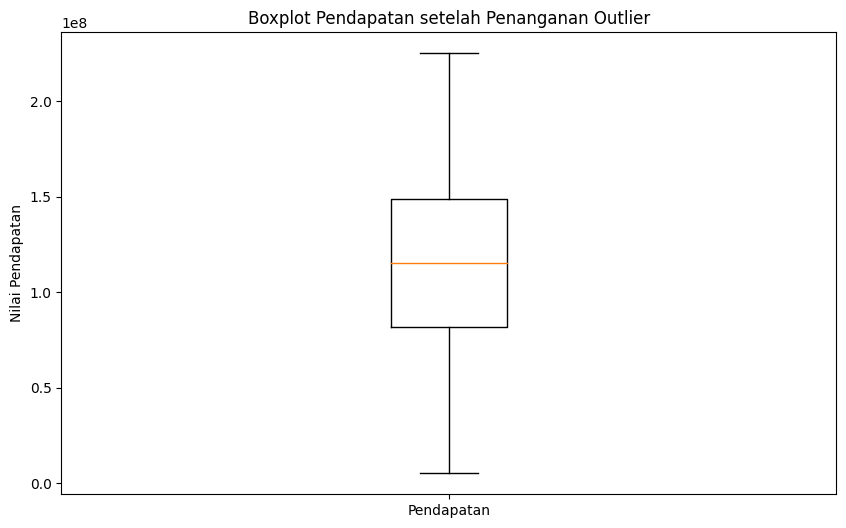

In [450]:
plt.figure(figsize=(10, 6))
plt.boxplot(trainFeatures['pendapatan'])
plt.ylabel('Nilai Pendapatan')
plt.title('Boxplot Pendapatan setelah Penanganan Outlier')
plt.xticks([1], ['Pendapatan'])
plt.show()

In [451]:
trainFeatures['jumlah_anak_balita'].unique()

array([nan,  0.,  1.,  2.])

In [452]:
trainFeatures['jumlah_anak_balita'].fillna(0, inplace=True)
trainFeatures['jumlah_anak_balita'] = trainFeatures['jumlah_anak_balita'].astype(int)
print(trainFeatures['jumlah_anak_balita'].dtype)

int32


In [453]:
trainFeatures['jumlah_anak_remaja'].unique()

array([nan,  0.,  1.,  2.])

In [454]:
trainFeatures['jumlah_anak_remaja'].fillna(0, inplace=True)
trainFeatures['jumlah_anak_remaja'] = trainFeatures['jumlah_anak_remaja'].astype(int)
print(trainFeatures['jumlah_anak_remaja'].dtype)

int32


In [455]:
trainFeatures['terakhir_belanja'].unique()

array([ 70.,  45.,  90.,  78.,   9.,  96.,  21.,  26.,  67.,  59.,  57.,
         5.,  65.,  61.,  25.,  16.,   0.,  50.,  69.,  84.,  56.,  54.,
        nan,  17.,  51.,  29.,  73.,  87.,  62.,  41.,  35.,   3.,  36.,
        58.,  64.,  55.,  12.,  30.,  28.,  11., 114.,   4.,  76.,  85.,
        15.,  80.,  81.,  37.,  47.,  20.,  60.,   6.,  77.,  22.,  32.,
        75.,  43.,  31.,  23.,  44.,  66.,  68.,  79.,  99.,  39.,  46.,
        33.,  27.,  19.,   8.,  14., 100.,  91.,  49.,  92.,  52.,   7.,
        48.,  82.,  72.,  89.,  34.,  63.,  94.,  86.,  74.,  53.,  13.,
        71.,  83.,  18.,  38.,   1.,  97.,  88.,  93.,  40.,   2.,  24.,
       105.,  10., 102.,  42., 103.,  95., 101., 106., 128.,  98., 104.,
       108., 122., 112., 124.])

In [456]:
rata2 = trainFeatures['terakhir_belanja'].mean()
rata2

47.25488576933664

In [457]:
trainFeatures['terakhir_belanja'] = trainFeatures['terakhir_belanja'].fillna(rata2)

In [458]:
trainFeatures['terakhir_belanja'] = trainFeatures['terakhir_belanja'].astype(int)
print(trainFeatures['terakhir_belanja'].dtype)

int32


In [459]:
trainFeatures['belanja_buah'].sample(5)

1751      8092.0
2682      6309.0
2881         NaN
2968     41962.0
3173    226105.0
Name: belanja_buah, dtype: float64

C:\Users\Akmal Fauzan\AppData\Local\Temp\ipykernel_26620\3687920672.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_buah_rows['pendapatan_persen'] = (null_buah_rows['pendapatan'] / nilai_maks_pendapatan) * 100


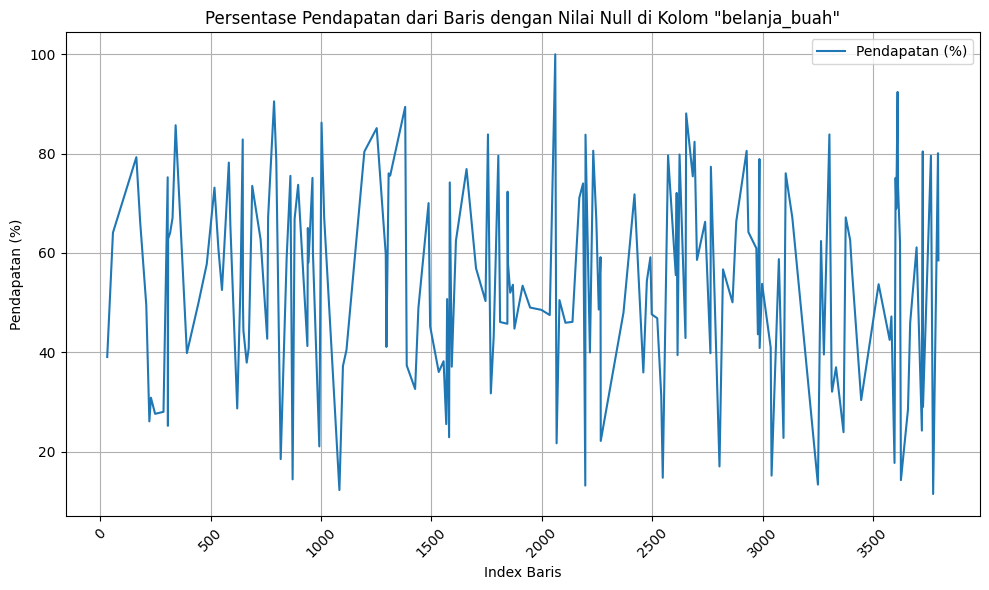

In [460]:
null_buah_rows = trainFeatures[trainFeatures['belanja_buah'].isnull()]

# Menghitung nilai maksimum pendapatan dari baris dengan 'belanja_buah' null
nilai_maks_pendapatan = null_buah_rows['pendapatan'].max()

# Mengonversi nilai pendapatan menjadi persentase
null_buah_rows['pendapatan_persen'] = (null_buah_rows['pendapatan'] / nilai_maks_pendapatan) * 100

# Membuat line chart untuk kolom 'pendapatan_persen'
plt.figure(figsize=(10, 6))
plt.plot(null_buah_rows.index, null_buah_rows['pendapatan_persen'], label='Pendapatan (%)')
plt.xlabel('Index Baris')
plt.ylabel('Pendapatan (%)')
plt.title('Persentase Pendapatan dari Baris dengan Nilai Null di Kolom "belanja_buah"')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [461]:
null_buah_rows['pendapatan'].mean()

111364570.1111111

In [462]:
null_buah_rows['pendapatan_persen'].mean()

53.99860844426342

In [463]:
print(trainFeatures['belanja_buah'].max())
print(trainFeatures['belanja_buah'].mean())

396508.0
59877.86226883798


In [464]:
top3 = trainFeatures['belanja_buah'].nlargest(3)  
top3_max = trainFeatures.loc[trainFeatures['belanja_buah'].isin(top3)]  
top3_max


,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
1077,1974,Doktor,Menikah,163139000.0,0,0,14,396508.0,341887.0,115311.0,299404.0,3.0,4.0,12.0,0.0,2013-10-28
1602,1962,Magister,Sendiri,182231000.0,0,0,20,396508.0,224553.0,70805.0,46529.0,0.0,8.0,5.0,0.0,2012-12-05
2725,1947,Doktor,Cerai Mati,161754000.0,0,0,47,390439.0,770763.0,307496.0,256921.0,1.0,1.0,8.0,0.0,2014-04-03


In [465]:
quantile_25 = null_buah_rows['pendapatan'].quantile(0.25)
quantile_50 = null_buah_rows['pendapatan'].quantile(0.50)  
quantile_75 = null_buah_rows['pendapatan'].quantile(0.75)  

# Interpolasi untuk menangani nilai yang hilang
def interpolate_values(x, y, x_new):
    f = interpolate.interp1d(x, y, fill_value="extrapolate")
    return f(x_new)

# Isi nilai null pada 'belanja_buah' dengan interpolasi
for batu, row in null_buah_rows.iterrows():
    if pd.notnull(row['belanja_buah']):  
        continue  
    if row['pendapatan'] <= quantile_25:  
        interpolated_value = interpolate_values(trainFeatures['pendapatan'], trainFeatures['belanja_buah'], row['pendapatan'])
        trainFeatures.loc[batu, 'belanja_buah'] = interpolated_value
    elif row['pendapatan'] <= quantile_50:  
        trainFeatures.loc[batu, 'belanja_buah'] = trainFeatures['belanja_buah'].median()
    elif row['pendapatan'] <= quantile_75:  
        trainFeatures.loc[batu, 'belanja_buah'] = trainFeatures['belanja_buah'].mean()
    else:
        trainFeatures.loc[batu, 'belanja_buah'] = row['pendapatan'] * 0.01


In [466]:

trainFeatures['belanja_buah'].isnull().sum()

45

In [467]:
trainFeatures[trainFeatures['belanja_buah'].isnull()]

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
31,1986,Sarjana,Sendiri,80543000.0,1,0,29,NaN,NaN,0.0,0.0,0.0,0.0,2.0,0.0,2014-03-28
222,1996,SMP,Sendiri,53816566.0,1,0,55,NaN,9542.0,11224.0,6695.0,0.0,0.0,0.0,0.0,NaN
229,1972,Doktor,Menikah,63657000.0,1,0,85,NaN,NaN,14161.0,4046.0,1.0,1.0,NaN,0.0,2013-08-19
248,1955,Magister,Rencana Menikah,56952497.0,0,1,39,NaN,17980.0,7116.0,10341.0,2.0,10.0,0.0,0.0,NaN
286,1978,Sarjana,Menikah,57781000.0,0,0,48,NaN,24276.0,32368.0,22253.0,1.0,1.0,2.0,0.0,2014-02-25
306,1977,SMP,Sendiri,51969839.0,1,0,35,NaN,21715.0,37742.0,11141.0,1.0,1.0,1.0,0.0,NaN
620,1950,SMP,Rencana Menikah,59197000.0,0,0,49,NaN,8092.0,22253.0,0.0,1.0,2.0,0.0,0.0,2012-11-18
663,1953,Magister,Menikah,78215179.0,1,0,34,NaN,26299.0,0.0,0.0,5.0,1.0,1.0,0.0,NaN
817,1999,Sarjana,Sendiri,38147109.0,1,0,64,NaN,38437.0,54643.0,1941.0,3.0,6.0,4.0,0.0,NaN
871,1977,SMA,Rencana Menikah,29747055.0,1,0,68,NaN,29148.0,NaN,74157.0,4.0,2.0,4.0,0.0,NaN


In [468]:
# Filter data dengan kondisi belanja_buah bernilai null
data_belanja_buah_null = trainFeatures[trainFeatures['belanja_buah'].isnull()]

# Cari nilai maksimum dari kolom pendapatan pada data yang sudah difilter
nilai_maks_pendapatan_belanja_buah_null = data_belanja_buah_null['pendapatan'].max()

print("Nilai maksimum pendapatan dengan belanja_buah null adalah:", nilai_maks_pendapatan_belanja_buah_null)


Nilai maksimum pendapatan dengan belanja_buah null adalah: 82126000.0


In [469]:
testFeatures.sample()

,ID,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
1208,4570,1958,Magister,Rencana Menikah,133890347.0,NaN,1.0,88.0,112469.0,491248.0,3239.0,32368.0,2.0,7.0,7.0,0.0,NaN
